In [2]:
import time                             # sys time
import numpy as np                      # numpy library for matrix computations
import matplotlib.pyplot as plt         # plot
from walk_simulation import walk_run

In [3]:
def run_episode(stepLength,stepDuration):

    #In this part we will specify the steps position and duration and we will implement foot trajectory generation
    params = {
        "doubleSupportDuration" : 0.25,
        "stepDuration" : stepDuration,
        "pelvisHeight" : 0.7,
        "maximumFootHeight" : 0.07,
        "stepWidth" :0.12,
        "stepLength" : stepLength,
        "numberOfFootPrints" :17,
        "GUI" : False,
    }

    t = time.time()
    vel, pos, delta_time = walk_run(params)
    elapsed = time.time() - t
    print(str(elapsed) + " seconds to run simulation")
    
    average_speed = grade(pos,vel,delta_time)
    
    return vel, pos, delta_time, average_speed
    
    

In [4]:
def grade(pos,vel,delta_time):
    x_pos = pos[:,0]
    x_dist = x_pos[-1] - x_pos[0]
    average_velocity = x_dist / delta_time
    return average_velocity

## Single simulation example

In [6]:
stepLength = 0.1
stepDuration = 1.2
vel, pos, delta_time, average_speed = run_episode(stepLength,stepDuration)

Successfull sim !
6.5045201778411865 seconds to run simulation


/Users/renard/Documents/etudes/EPFLMA3/Legged/project/legged_dcm_project/code/walk_simulation.py:198: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pos = np.array([*np.array(positions)[:,0]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


## Grid Search

In [42]:
stepDurationSpace=np.arange(0.7,1.4,0.1)
stepLengthSpace=np.arange(0.05,0.5,0.05)

sample_number = len(stepDurationSpace) * len(stepLengthSpace)
est_time = 6 * sample_number

print("sample number = " + str(sample_number))
print("estimated time = " + str(est_time/60) + " [min]")

sample number = 63
estimated time = 6.3 [min]


In [43]:
results = []

t0 = time.time()

for duration in stepDurationSpace:
    for length in stepLengthSpace:
        print("Length = "  + str(length) + " , Duration = " + str(duration) )
        vel, pos, delta_time, average_speed = run_episode(length,stepDuration)
        result = {
            "stepDuration" : duration,
            "stepLength" : length,
            "average_speed" : average_speed,
        }
        results.append(result)

sim_time = time.time() - t0
print("Total search time : " + str(sim_time))

Length = 0.05 , Duration = 0.7


/Users/renard/Documents/etudes/EPFLMA3/Legged/project/legged_dcm_project/code/walk_simulation.py:198: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pos = np.array([*np.array(positions)[:,0]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Successfull sim !
6.355984210968018 seconds to run simulation
Length = 0.1 , Duration = 0.7
Successfull sim !
6.542984962463379 seconds to run simulation
Length = 0.15000000000000002 , Duration = 0.7
Successfull sim !
5.756924867630005 seconds to run simulation
Length = 0.2 , Duration = 0.7
Successfull sim !
6.118803024291992 seconds to run simulation
Length = 0.25 , Duration = 0.7
Successfull sim !
5.909096956253052 seconds to run simulation
Length = 0.3 , Duration = 0.7
Successfull sim !
5.803241014480591 seconds to run simulation
Length = 0.35000000000000003 , Duration = 0.7
Successfull sim !
5.885380983352661 seconds to run simulation
Length = 0.4 , Duration = 0.7
Successfull sim !
5.561635971069336 seconds to run simulation
Length = 0.45 , Duration = 0.7
Successfull sim !
5.814143896102905 seconds to run simulation
Length = 0.05 , Duration = 0.7999999999999999
Successfull sim !
6.365787982940674 seconds to run simulation
Length = 0.1 , Duration = 0.7999999999999999
Successfull sim

TypeError: can only concatenate str (not "float") to str

Lenght - Duration Space plot : 


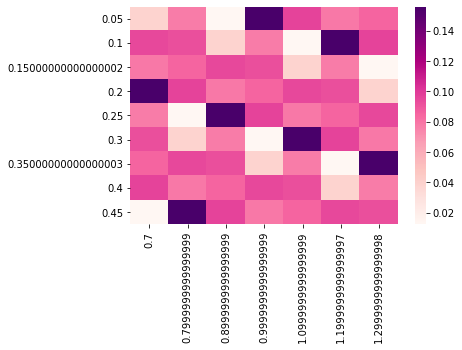

Optimal duration : 0.7
Optimal length : 0.2


In [63]:
import seaborn as sns

averageSpeeds = np.array([e['average_speed'] for e in results])


hmvalues = np.reshape(averageSpeeds, (-1, len(stepDurationSpace)))
ax = sns.heatmap(hmvalues, cmap="RdPu", xticklabels=stepDurationSpace, yticklabels=stepLengthSpace)


print("Lenght - Duration Space plot : ")
plt.show()

max_s = 0
for r in results:
    if r['average_speed'] > max_s:
        max_s = r['average_speed']
        opt_length = r['stepLength']
        opt_duration = r['stepDuration']
        
print("Optimal duration : " + str(opt_duration))
print("Optimal length : " + str(opt_length))